# **Non ho niente da dire**
A Data Visualization Project about Hong Kong Extradition Protests.<br/>
name: Zhao Ying

## Table of Contents
- [1. Project Introduction](#1-project-introduction)
  - [1.1 Background](#11-background)
  - [1.2 Goal](#12-goal)
  - [1.3 Research Questions](#13-research-questions)
- [2. Data Preparation](#2-data-preparation)
  - [2.1 Data Description](#21-data-description)
  - [2.2 Data Cleaning](#22-data-cleaning)
- [3. Data Analysis and Visualization](#3-data-analysis-and-visualization)



## 1. Project Introduction

### 1.1 Background
 •	**Domain**: political and social movements.
 
 •	**Question**: On March 15, 2019, Hong Kong started a series of protests against a proposed amendment to the Fugitive Offenders Ordinance, which would allow extradition to mainland China. 
This sparked longest protest movements in Hong Kong's history, as citizens feared it would undermine the region's autonomy and legal protections by allowing extraditions to mainland China. 
The protests lacked a specific end date, but for this analysis, I take June 30, 2020, the date when the Hong Kong national security law (was created in response to the extraditon protests) was enacted, as the conclusion of this period. 
The failure of these protests marked a significant moment, symbolizing the downfall of Hong Kong’s autonomy.

 
### 1.2 Goal
My goal is to compare the extradition protests with other protests in Hong Kong, figure out the unique features of the extradition protests. I also want this project to be seen as a comprehensive archive to record the scale, scope, and impact of the 20169-2020 protests. 

### 1.3 Research Questions
 <ol>
  <li> <strong>How</strong> do the extradition protests <strong>compare</strong> to other protests during <strong>the same period</strong>?</li>
  <li> <strong>Where</strong> were the protests <strong>geographically</strong> concentrated?</li> 
  <li> <strong>What</strong> were the <strong>connections</strong> among the extradition protests?</li> 
</ol>


## 2. Data Preparation

### 2.1 Data Description

The datasets are from WikiData and ACLED.<br>

**ACLED Dataset**: The ACLED (Armed Conflict Location & Event Data) dataset is a comprehensive collection of data on political violence and protest events in the world. For this project, I used ACLED's data export tool to obtain data specific to China from March 15, 2019, to June 30, 2020. 

**WikiData Dataset**: WikiData is a linked open data platform that provides structured data to support Wikipedia and other Wikimedia projects. For this project, I queried WikiData to extract information on specific protest events in Hong Kong from March 15, 2019, to June 30, 2020, since it only has data of big events related to the extradition protests.

### 2.2 Data Cleaning
#### 2.2.1 ACLED Dataset

In this step, what i did are:<br/>
 •	Filtered the dataset to only include protests happened in Hong Kong.<br/>
 •	Converted the time format to numeral for filters.<br/>
 •	Checked missing values, removed irrelevant, and repetitive columns. and filled in ones are useful to the project.<br/>
 •	Converted values in location to a standardised format. 

   The reasons that why I removed those columns:<br/>
   •	*actor2* and *assoc_actor_2*:  These columns have a significant amount of missing values and are not critical for my analysis.<br/>
   •	*civilian_targeting*:  This column contains only 26 entries, describing individual attacks, which are not the focus of this project. <br/>
   •	*admin2*:  The values in this column are redundant as they are the same as those in the *location* column.<br/>
   •  *admin3*:  This column represents more specific locations names but has about 2/3 of its values missing, and i can use *latitude* and *longitude* to achieve the same effect.

In [1]:
# ACLED Dataset
import pandas as pd
df_protests_2019_2020 = pd.read_csv("data/2019-03-15-2020-06-30-East_Asia-China.csv" )

# Filter data for Hong Kong
df_hk_2019_2020 = df_protests_2019_2020[df_protests_2019_2020['location'].str.contains('Hong Kong', case=False, na=False)]

# Convert the date column as numeral format
df_hk_2019_2020['event_date'] = pd.to_datetime(df_hk_2019_2020['event_date'], format='%d %B %Y', errors='coerce')


# Remove irrelevant columns
df_hk_2019_2020_cleaned = df_hk_2019_2020.drop(columns=['actor2', 'assoc_actor_2', 'civilian_targeting', 'admin2', 'admin3'])


# Function to standardise the 'location' column
def stand_location(location):
    if pd.isnull(location) or location.strip().lower() == 'hong kong': #since we have this in admin1
        return 'unknown'
    else:
        # Split the string and return the administrative region part
        parts = location.split('-')
        if len(parts) > 1:
            return parts[1].strip()
        else:
            return 'unknown'

df_hk_2019_2020_cleaned['location'] = df_hk_2019_2020_cleaned['location'].apply(stand_location)

#check the result
#print(df_hk_2019_2020_cleaned.info())
#print(df_hk_2019_2020_cleaned.head(10))

C:\Users\ge75\AppData\Local\Temp\ipykernel_17668\1471755338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hk_2019_2020['event_date'] = pd.to_datetime(df_hk_2019_2020['event_date'], format='%d %B %Y', errors='coerce')


For answering the main question, i need to distinguish events related to Extradition Protests  from those that are not. **the five demands** is the battle cry of the whole protests, after viewing the dataset, i discovered that **five demands moment** is also a common value in *assoc_actor_1* so i used it with searching specific keywords in *notes* to create a new column to achieve the aim. 

In [2]:
# Create a new column 'related_ep' 
def if_five_demands_movement(row):
    keywords = [ "Extradition Bill", "Five Demands"]
    assoc_actor = str(row['assoc_actor_1']) if not pd.isnull(row['assoc_actor_1']) else ""
    notes = str(row['notes'])

    if 'Five Demands Movement' in assoc_actor or any(keyword in notes for keyword in keywords): 
        return 'yes'
    elif pd.isnull(row['assoc_actor_1']):  #assoc_actor has a missing value and no keywords were found in notes
        return 'unknown'
    else:
        return 'no' #assoc_actor has a different value and no keywords were found in notes
    
df_hk_2019_2020_cleaned['related_ep'] = df_hk_2019_2020_cleaned.apply(if_five_demands_movement, axis=1)

# Fill missing values in 'assoc_actor_1' with 'Unknown'
df_hk_2019_2020_cleaned['assoc_actor_1'].fillna('Unknown', inplace=True)


# Check the result
#df_hk_2019_2020_cleaned[['assoc_actor_1','related_ep','notes']]

C:\Users\ge75\AppData\Local\Temp\ipykernel_17668\538324292.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hk_2019_2020_cleaned['assoc_actor_1'].fillna('Unknown', inplace=True)


I reviewed the CSV file to understand the meanings of the event types and sub-event types.Under the *Riots* category, there are *Violent demonstration* and *Mob violence*. Since this project focuses on group actions, and *Mob violence* events are typically anonymous with unclear intentions and involve only a few individuals, I decided to remove these events from the analysis.

In [3]:
#check events_type
unique_event_types = df_hk_2019_2020_cleaned['event_type'].unique()
unique_sub_event_types = df_hk_2019_2020_cleaned['sub_event_type'].unique()
#print("Unique event types: ")
#print(unique_event_types)
#print("unique sub event types: ")
#print(unique_sub_event_types)

hk_protests_type_cleaned = df_hk_2019_2020_cleaned[
     (df_hk_2019_2020_cleaned['event_type'] == 'Protests') |
    ((df_hk_2019_2020_cleaned['event_type'] == 'Riots') & (df_hk_2019_2020_cleaned['sub_event_type'] == 'Violent demonstration'))
]


#print(hk_protests_type_cleaned.info())
#print(hk_protests_ACLED.head(10))

# Save the cleaned dataset to a new CSV file
hk_protests_type_cleaned.to_csv("data/hk_protests_ACLED.csv", index=False)


#### 2.2.2 LOD Dataset

For the LOD dataset, I queried data from Wikidata using SPARQL.<br/>
For different purposes, i used two queries, one for more specific events to cross verification of ACLED dataset, the other one queried all the relation amd entity for making a connection graph.<br/>
then I processed the data of the second one into an RDF graph, converted it into a CSVfile for further use. 

In [33]:
# LOD Dataset RDF
from SPARQLWrapper import SPARQLWrapper, JSON

from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import RDF, XSD

# Get the wikidata endpoint
wikidata_sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Prepare the queries
verification_query ="""
SELECT ?event ?eventLabel ?date ?coordinateLocation WHERE {
  ?event wdt:P31 ?eventType.       # Instance of eventType
  VALUES ?eventType { wd:Q273120 wd:Q175331 }  # Instance of protest or demonstration
  ?event wdt:P585 ?date.           # Date of the event
  ?event wdt:P276 wd:Q8646.        # Location is Hong Kong
  OPTIONAL { ?event wdt:P625 ?coordinateLocation. } # Coordinate location

  FILTER (?date >= "2019-03-15T00:00:00Z"^^xsd:dateTime && ?date <= "2020-06-30T23:59:59Z"^^xsd:dateTime)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY ?date
"""

connection_query = """
SELECT ?event ?eventLabel ?relatedEntity ?relatedEntityLabel WHERE {
  ?event wdt:P361 wd:Q64509602.    # Part of 2019–2020 Hong Kong protests
  ?event ?relation ?relatedEntity. # Any relation to an entity
  ?relatedEntity wdt:P31 ?type.    # there it's an entity
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 300
"""

#create a function of using SPARQL to query and return DF
def sparql_query(query):
    wikidata_sparql.setQuery(query)
    wikidata_sparql.setReturnFormat(JSON)
    results = wikidata_sparql.query().convert()

    #convert results to DF
    data = []
    for result in results["results"]["bindings"]:
        row = {key: result[key]["value"] for key in result}
        data.append(row)
    return pd.DataFrame(data)

df_verification = sparql_query(verification_query)
df_connection = sparql_query(connection_query)

#check the results
display(df_verification.head())
display(df_connection.head())


,event,date,coordinateLocation,eventLabel
0,http://www.wikidata.org/entity/Q64682572,2019-06-09T00:00:00Z,Point(114.164972942 22.282450673),9 June 2019 Hong Kong anti-extradition bill pr...
1,http://www.wikidata.org/entity/Q64576952,2019-06-12T00:00:00Z,Point(114.165577777 22.280791666),12 June 2019 demonstration against extradition...
2,http://www.wikidata.org/entity/Q64620775,2019-06-16T00:00:00Z,Point(114.167392295 22.282257077),16 June 2019 Hong Kong anti-extradition bill p...
3,http://www.wikidata.org/entity/Q64780500,2019-06-21T00:00:00Z,Point(114.172183072 22.279476592),21 June 2019 Hong Kong anti-extradition bill p...
4,http://www.wikidata.org/entity/Q66183788,2019-08-03T00:00:00Z,Point(114.168055555 22.297777777),3 August 2019 Hong Kong anti-extradition bill ...


,event,relatedEntity,eventLabel,relatedEntityLabel
0,http://www.wikidata.org/entity/Q64576952,http://www.wikidata.org/entity/Q148,12 June 2019 demonstration against extradition...,People's Republic of China
1,http://www.wikidata.org/entity/Q64577033,http://www.wikidata.org/entity/Q148,6 June 2019 demonstration against extradition ...,People's Republic of China
2,http://www.wikidata.org/entity/Q64620775,http://www.wikidata.org/entity/Q148,16 June 2019 Hong Kong anti-extradition bill p...,People's Republic of China
3,http://www.wikidata.org/entity/Q64576952,http://www.wikidata.org/entity/Q148,12 June 2019 demonstration against extradition...,People's Republic of China
4,http://www.wikidata.org/entity/Q64577033,http://www.wikidata.org/entity/Q148,6 June 2019 demonstration against extradition ...,People's Republic of China


I cleaned and standardised *date*, *latitude* and *longitude* columns of ACLED dataset and verification dataset, since then share the same values with different format.<br/>
After I finished cleaning, i can merge them to **cross-verify**.

In [52]:
import re

# Load datasets
df_acled = pd.read_csv('data/hk_protests_ACLED.csv')

# Convert date columns to datetime format
df_acled['event_date'] = pd.to_datetime(df_acled['event_date'])
df_verification['date'] = pd.to_datetime(df_verification['date'])

# Ensure both Date columns are in the same format
df_verification['event_date'] = pd.to_datetime(df_verification['date']).dt.tz_localize(None)  
df_acled['event_date'] = df_acled['event_date'].dt.tz_localize(None)  

#Split the coordinateLocation of verification dataset
def split_coordinates(coord):
    if isinstance(coord, str):  # Ensure coord is a string
        match = re.search(r'Point\(([\d\.]+) ([\d\.]+)\)', coord)
        if match:
            longitude, latitude = match.groups()
            return float(latitude), float(longitude)
    return None, None

df_verification[['latitude', 'longitude']] = df_verification['coordinateLocation'].apply(lambda x: pd.Series(split_coordinates(x)))

df_verification['latitude'] = df_verification['latitude'].round(4)
df_verification['longitude']= df_verification['longitude'].round(4)

#print(df_acled.head())
#print(df_verification.head())

#merge them to verify the data
verified_time = pd.merge(df_acled, df_verification, on=['event_date'], how='inner')
verified_events = pd.merge(df_acled, df_verification, on=['event_date','latitude', 'longitude'], how='inner')
print(verified_time)
print(verified_time.shape[0])
print(verified_events)
print(verified_events.shape[0])

    event_id_cnty event_date  year  time_precision   disorder_type event_type  \
0         CHN3965 2020-05-27  2020               1  Demonstrations   Protests   
1         CHN3971 2020-05-27  2020               1  Demonstrations   Protests   
2         CHN3972 2020-05-27  2020               1  Demonstrations      Riots   
3         CHN3975 2020-05-27  2020               1  Demonstrations      Riots   
4         CHN3964 2020-05-27  2020               1  Demonstrations   Protests   
..            ...        ...   ...             ...             ...        ...   
216       CHN3191 2019-06-12  2019               1  Demonstrations      Riots   
217       CHN3163 2019-06-09  2019               1  Demonstrations   Protests   
218       CHN3166 2019-06-09  2019               1  Demonstrations      Riots   
219       CHN3165 2019-06-09  2019               1  Demonstrations   Protests   
220       CHN8569 2019-06-09  2019               1  Demonstrations   Protests   

                sub_event_t

Here I crated a RDF graph and make it as Turtle format.

In [102]:
#Create an RDF graph
g = Graph()

#Define namespaces
WIKIDATA = Namespace("http://www.wikidata.org/entity/")
SCHEMA = Namespace("http://schema.org/")

# Bind namespaces to prefixes
g.bind("wd", WIKIDATA)
g.bind("schema", SCHEMA)

for _, row in df_connection.iterrows():
    event_uri = URIRef(row['event'])
    event_label = Literal(row['eventLabel'], datatype=XSD.string)
    related_entity_uri = URIRef(row['relatedEntity'])
    related_entity_label = Literal(row['relatedEntityLabel'], datatype=XSD.string)
    
    g.add((event_uri, SCHEMA.name, event_label))
    g.add((event_uri, SCHEMA.relatedEntity, related_entity_uri))
    g.add((related_entity_uri, SCHEMA.name, related_entity_label))

#check how many data were fetched
print(f"Number of triples in the RDF graph: {len(g)}")
print(f"Number of duplicate rows: {df_connection.duplicated().sum()}") #we know why we have 117 as the result

# the RDF graph to Turtle format
rdf_data = g.serialize(format="turtle")
#print(rdf_data)

# Convert the RDF graph to a pandas DataFrame
triples = []
for subj, pred, obj in g:
    triples.append((str(subj), str(pred), str(obj)))

df_rdf = pd.DataFrame(triples, columns=['subject', 'predicate', 'object'])


df_rdf.to_csv('data/hk_connection_wikidata.csv', index=False)

Number of triples in the RDF graph: 117
Number of duplicate rows: 223


## 3. Data Analysis and Visualization

In this part, I compared numbers and time period of types of events that are related to the extradition protests or not. 

In [105]:
#create two variables for extradition protests events and non ones.
df_ep = df_acled[df_acled['related_ep'] == 'yes']
df_non_ep = df_acled[df_acled['related_ep'] == 'no']

ep_types = df_ep['event_type'].value_counts()
non_ep_types = df_non_ep['event_type'].value_counts()

print(ep_types)
print(non_ep_types)


event_type
Protests    414
Riots       189
Name: count, dtype: int64
event_type
Protests    486
Riots        25
Name: count, dtype: int64


I used matplotlib to create a bar plot to compare event types.

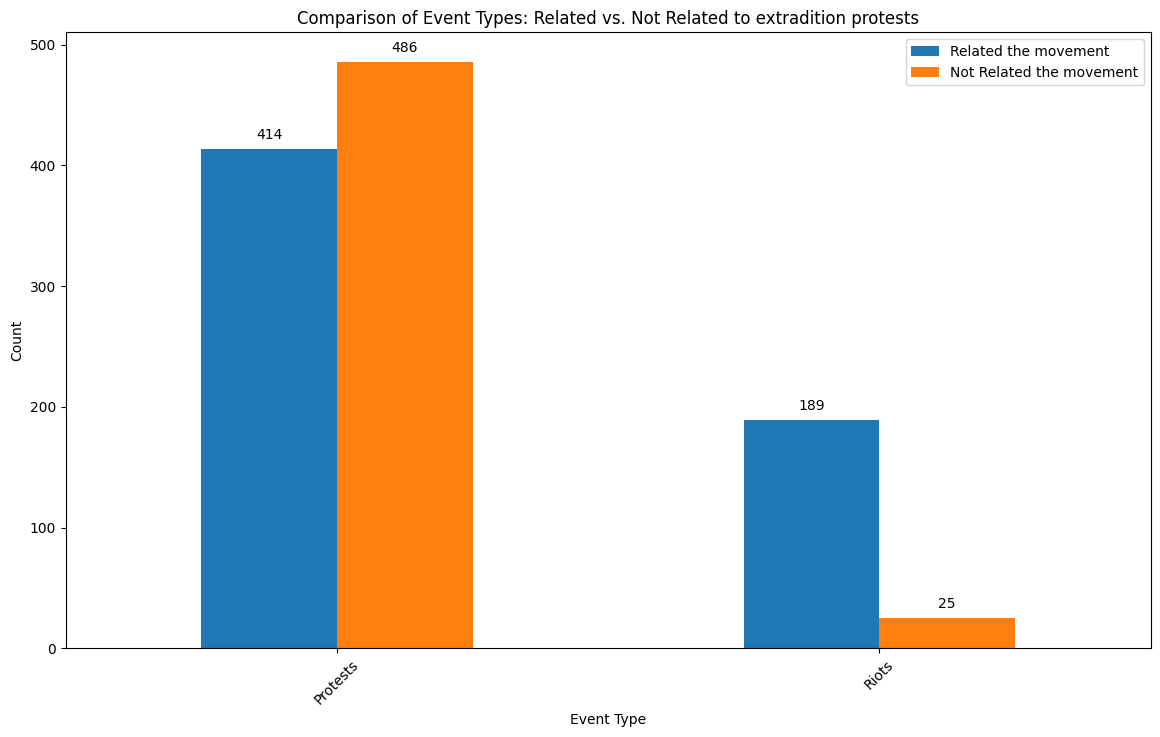

<Figure size 640x480 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
df_types_comparison = pd.DataFrame({
    'Related the movement': ep_types,
    'Not Related the movement': non_ep_types
}).fillna(0)

# Plot the comparison and capture the axis
ax = df_types_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Event Types: Related vs. Not Related to extradition protests')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(['Related the movement', 'Not Related the movement'])
plt.show()

I used matplotlib to create a bar plot to compare event sub types.

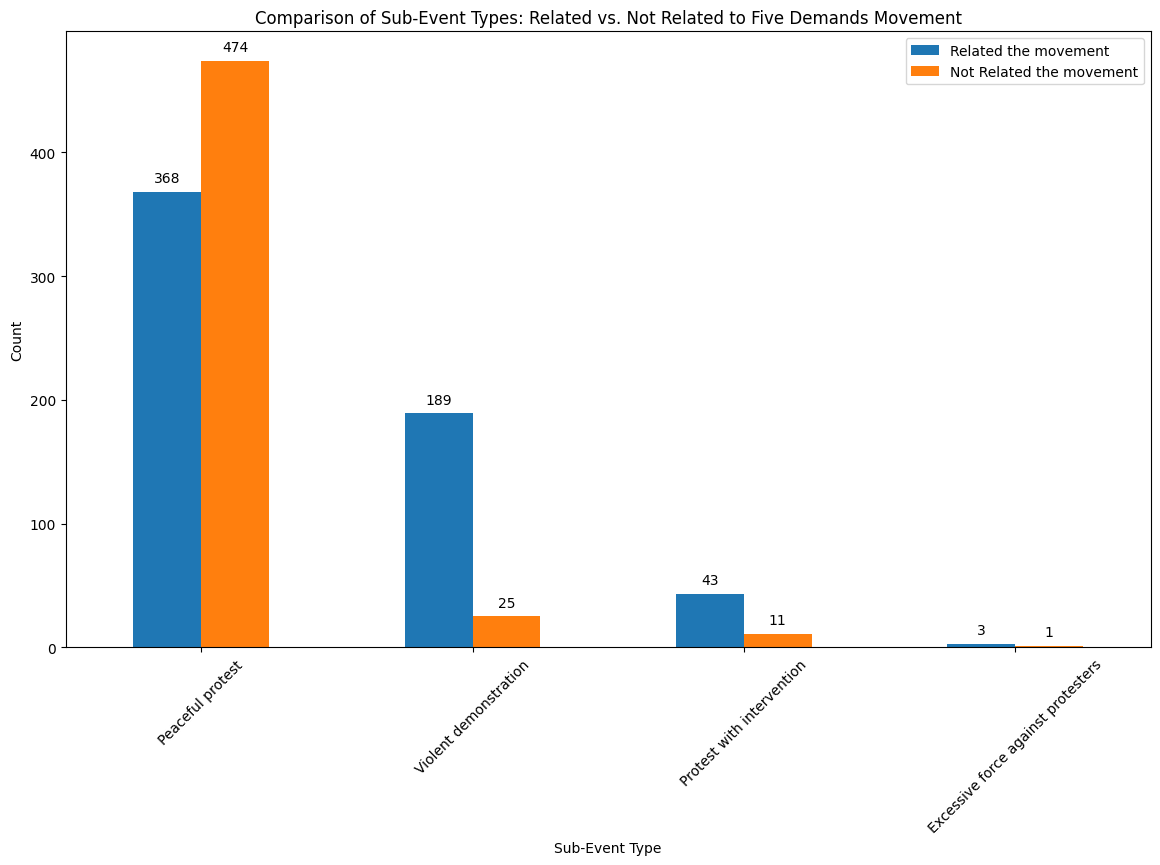

<Figure size 640x480 with 0 Axes>

In [92]:
ep_sub_event_types = df_ep['sub_event_type'].value_counts()
non_ep_sub_event_types = df_non_ep['sub_event_type'].value_counts()

# Create a DataFrame for comparison
df_sub_types_comparison = pd.DataFrame({
    'Related the movement': ep_sub_event_types,
    'Not Related the movement': non_ep_sub_event_types
}).fillna(0)

# Plot the stacked bar chart
ax = df_sub_types_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Sub-Event Types: Related vs. Not Related to Five Demands Movement')
plt.xlabel('Sub-Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(['Related the movement', 'Not Related the movement'])
plt.show()

analyzed the time trend of two types of events.

C:\Users\ge75\AppData\Local\Temp\ipykernel_17668\2382439641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ep['event_date'] = pd.to_datetime(df_ep['event_date'])
C:\Users\ge75\AppData\Local\Temp\ipykernel_17668\2382439641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_ep['event_date'] = pd.to_datetime(df_non_ep['event_date'])


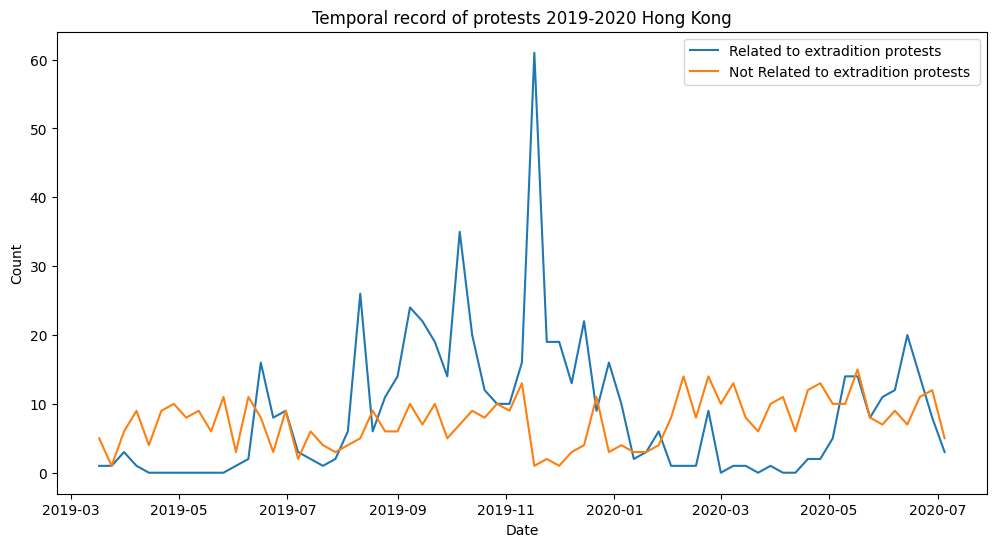

<Figure size 640x480 with 0 Axes>

In [106]:
#Temporal Analysis
df_ep['event_date'] = pd.to_datetime(df_ep['event_date'])
df_non_ep['event_date'] = pd.to_datetime(df_non_ep['event_date'])

# Set the event_date column as the index to help resampling
df_ep.set_index('event_date', inplace=True)
df_non_ep.set_index('event_date', inplace=True)

# Resample data by week
related_weekly = df_ep.resample('W').size()
not_related_weekly = df_non_ep.resample('W').size()

plt.figure(figsize=(12, 6))
plt.plot(related_weekly, label='Related to extradition protests')
plt.plot(not_related_weekly, label='Not Related to extradition protests ')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Temporal record of protests 2019-2020 Hong Kong')
plt.legend()
plt.show()

1Where were the main protest locations in Hong Kong?

To answer the question: Where were the protests geographically concentrated? we need a map to visualize the number of protests by different administrative regions. This map is a GeoJSON file for Hong Kong administrative regions on DATA.GOV.HK.

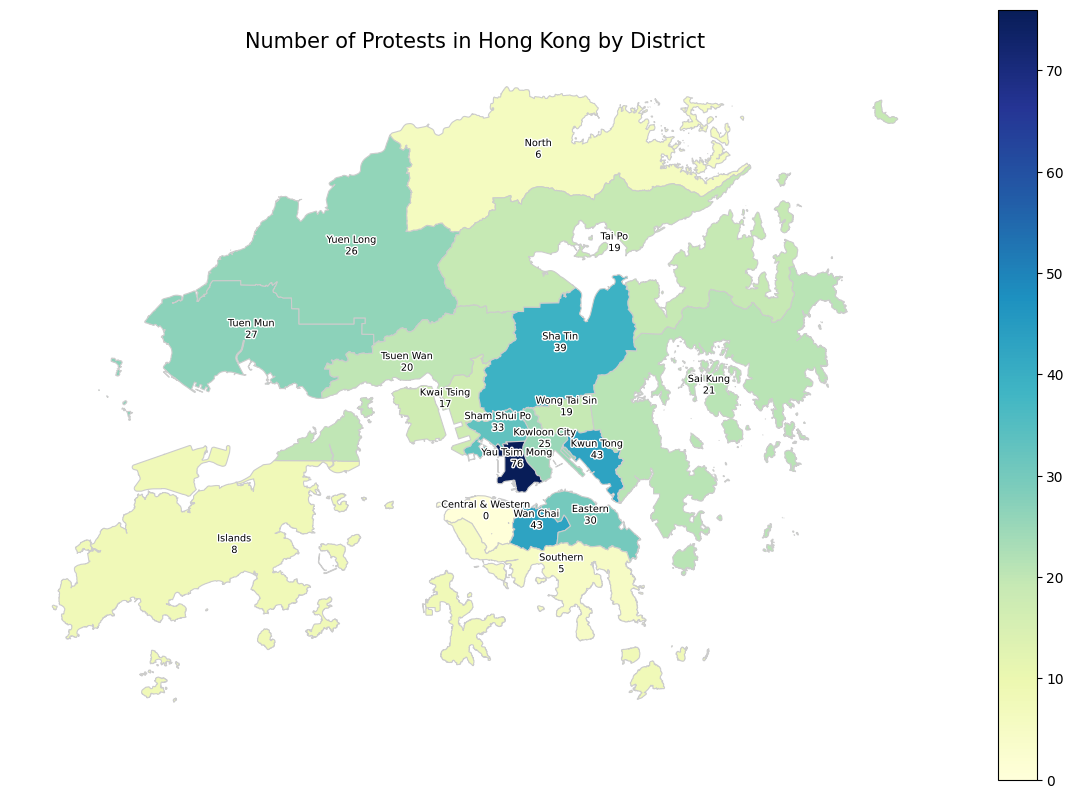

In [93]:
#pip install folium geopandas
import geopandas as gpd
import matplotlib.patheffects as PathEffects

# Load a GeoJSON file for Hong Kong administrative regions 
geojson_path = 'data/Hong_Kong_18_Districts.geojson'  
geo_data = gpd.read_file(geojson_path)

geo_data['ENAME'] = geo_data['ENAME'].str.title()

# Aggregate the number of protests by administrative regions
protest_counts = df_ep['location'].value_counts().reset_index()
protest_counts.columns = ['location', 'count']

# Merge protest data with GeoJSON data
geo_data = geo_data.rename(columns={"ENAME": "location"})
merged = geo_data.set_index('location').join(protest_counts.set_index('location'))

# Fill NaN values with 0 for districts with no protests
merged['count'] = merged['count'].fillna(0)

# Plot the choropleth map using geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Number of Protests in Hong Kong by District', fontsize=15)

# Add interactive popups
for idx, row in merged.iterrows():
    text = plt.text(row.geometry.centroid.x, row.geometry.centroid.y, 
             f"{row.name}\n{int(row['count'])}", 
             horizontalalignment='center', fontsize=7, color='black')
    text.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Remove axis to focus on the map
ax.set_axis_off()

# Save the plot as an image file
plt.savefig('Viz/hk_protests_numbers_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

To answer the question "What were the major events associated with the extradition protests?", I visualized the connections between events and related entities using a network graph.

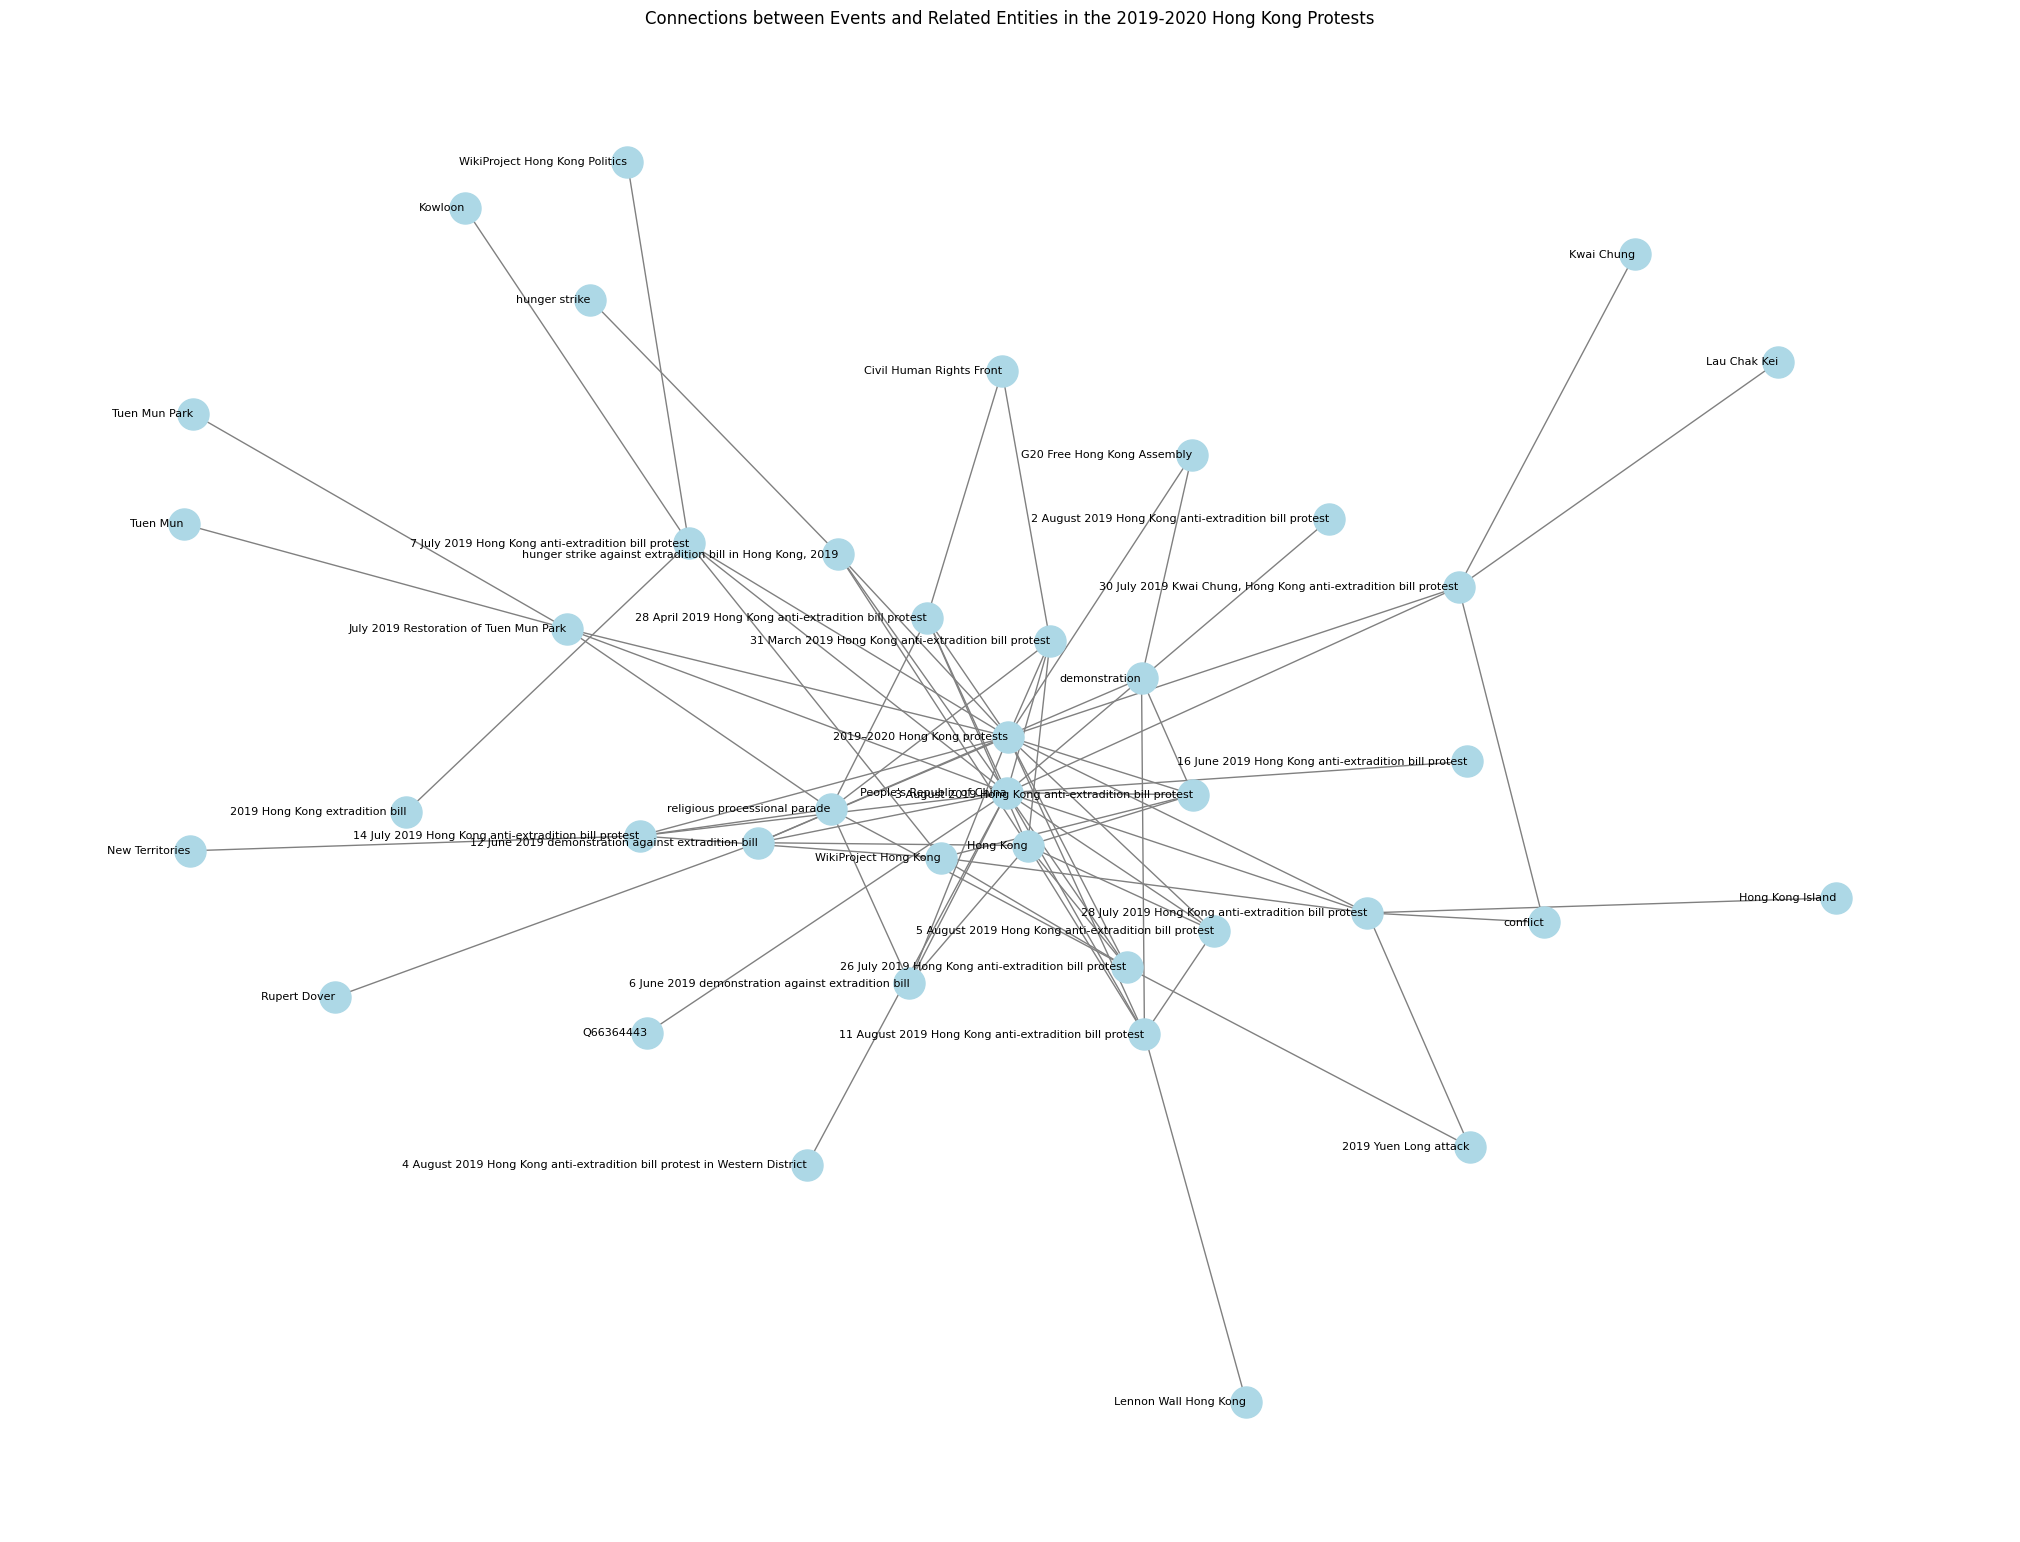

<Figure size 640x480 with 0 Axes>

In [103]:
import networkx as nx

G = nx.Graph()

for subj, pred, obj in g:
    subj_label = g.value(subj, SCHEMA.name)
    obj_label = g.value(obj, SCHEMA.name)
    if subj_label and obj_label:
        G.add_node(str(subj), label=str(subj_label))
        G.add_node(str(obj), label=str(obj_label))
        if pred == SCHEMA.relatedEntity:
            G.add_edge(str(subj), str(obj))

# Create a layout for our nodes 
g_layout = nx.spring_layout(G, k=0.5)  # Increase k to spread out the nodes

plt.figure(figsize=(20, 15))  # Increase figure size
nx.draw(G, g_layout, with_labels=False, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)

plt.title('Connections between Events and Related Entities in the 2019-2020 Hong Kong Protests')

labels = nx.get_node_attributes(G, 'label')
for node, (x, y) in g_layout.items():
    plt.text(x, y, labels[node], fontsize=8, ha='right', va='center')

plt.show()